In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../../'))

import numpy as np
import arrayfire as af
from matplotlib import pyplot as plt

from dg_maxwell import params
from dg_maxwell import msh_parser
from dg_maxwell import advection_2d
from dg_maxwell import global_variables as gvar
from dg_maxwell import utils
from dg_maxwell import wave_equation_2d as w2d
from dg_maxwell import isoparam
from dg_maxwell import lagrange
from dg_maxwell import advection_2d_arbit_mesh as a2d_arbit_mesh

af.set_backend(params.backend)
af.set_device(params.device)

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True

[[ 0  9]
 [10 19]
 [20 29]
 [30 39]
 [40 49]
 [50 59]
 [60 69]
 [70 79]
 [80 89]
 [90 99]]
[[ 0 90]
 [ 1 91]
 [ 2 92]
 [ 3 93]
 [ 4 94]
 [ 5 95]
 [ 6 96]
 [ 7 97]
 [ 8 98]
 [ 9 99]]
gmshtranslator friendly reminder: rules and actions prototypes


def node_condition(tag,x,y,z,physgroups): 
def node_action(tag,x,y,z):
def element_condition(eletag,eletype,physgrp,nodes):
def element_action(eletag,eletype,physgrp,nodes):


In [41]:
params.mesh_file = '../../read_and_plot_mesh/mesh/square_10_10.msh'
params.c_x = 1.5
params.c_y = 0.5
advec_var = gvar.advection_variables(params.N_LGL, params.N_quad,
                                     params.x_nodes, params.N_Elements,
                                     params.c, params.total_time, params.wave,
                                     params.c_x, params.c_y, params.courant,
                                     params.mesh_file, params.total_time_2d)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


gmshTranslator: Initializing...
gmshTranslator: Mesh has 441 nodes.
gmshTranslator: Mesh has 144 elements.
gmshTranslator: Processed 589 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements
advection_variables __init__ completed


gmshTranslator: Ending


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


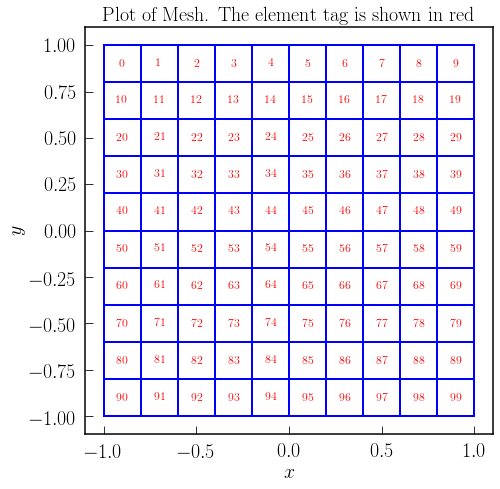

In [12]:
axes_handler = plt.axes()

msh_parser.plot_mesh_grid(advec_var.nodes, advec_var.elements,
                          advec_var.xi_LGL, advec_var.eta_LGL,
                          axes_handler, plot_LGL_grid = False,
                          print_element_tag = True)

# plt.title(r'Grid plot of a mesh for $N_{LGL} = 8$.'
#           '\n Red lines are mesh grid, and \n'
#           'blue lines are element boundaries.')
plt.title(r'Plot of Mesh. The element tag is shown in red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')

plt.savefig('square.png')
plt.show()

# Vectorise the Lax-Friedrichs flux

In [42]:
# Create 4 arrays to store the u_e_ij of the edges

# Left edge

left_edge_id = 0
u_left = a2d_arbit_mesh.u_at_edge(advec_var.u_e_ij,
                                  edge_id = left_edge_id,
                                  advec_var = advec_var)
# for element_tag, x_edge in enumerate(np.array(af.transpose(u_left))):
#     print(element_tag, '\t', np.round(x_edge, 3))
# [SEEMS FINE]

# Bottom edge
bottom_edge_id = 1
u_bottom = a2d_arbit_mesh.u_at_edge(advec_var.u_e_ij,
                                    edge_id = bottom_edge_id,
                                    advec_var = advec_var)
# for element_tag, y_edge in enumerate(np.array(af.transpose(u_bottom))):
#     print(element_tag, '\t', np.round(y_edge, 3))
# [SEEMS FINE]

# Right edge
right_edge_id = 2
u_right = a2d_arbit_mesh.u_at_edge(advec_var.u_e_ij,
                                   edge_id = right_edge_id,
                                   advec_var = advec_var)
# for element_tag, x_edge in enumerate(np.array(af.transpose(u_right))):
#     print(element_tag, '\t', np.round(x_edge, 3))
# [SEEMS FINE]

# Top edge
top_edge_id = 3
u_top = a2d_arbit_mesh.u_at_edge(advec_var.u_e_ij,
                                 edge_id = top_edge_id,
                                 advec_var = advec_var)

# [SEEMS FINE]

# [OVERALL FINE]

In [43]:
for element_tag, other_element_tag in enumerate(np.array(advec_var.interelement_relations[:, 3])):
    print(element_tag, '\t', other_element_tag)


0 	 90
1 	 91
2 	 92
3 	 93
4 	 94
5 	 95
6 	 96
7 	 97
8 	 98
9 	 99
10 	 0
11 	 1
12 	 2
13 	 3
14 	 4
15 	 5
16 	 6
17 	 7
18 	 8
19 	 9
20 	 10
21 	 11
22 	 12
23 	 13
24 	 14
25 	 15
26 	 16
27 	 17
28 	 18
29 	 19
30 	 20
31 	 21
32 	 22
33 	 23
34 	 24
35 	gmshTranslator: Ending
 25
36 	 26
37 	 27
38 	 28
39 	 29
40 	 30
41 	 31
42 	 32
43 	 33
44 	 34
45 	 35
46 	 36
47 	 37
48 	 38
49 	 39
50 	 40
51 	 41
52 	 42
53 	 43
54 	 44
55 	 45
56 	 46
57 	 47
58 	 48
59 	 49
60 	 50
61 	 51
62 	 52
63 	 53
64 	 54
65 	 55
66 	 56
67 	 57
68 	 58
69 	 59
70 	 60
71 	 61
72 	 62
73 	 63
74 	 64
75 	 65
76 	 66
77 	 67
78 	 68
79 	 69
80 	 70
81 	 71
82 	 72
83 	 73
84 	 74
85 	 75
86 	 76
87 	 77
88 	 78
89 	 79
90 	 80
91 	 81
92 	 82
93 	 83
94 	 84
95 	 85
96 	 86
97 	 87
98 	 88
99 	 89


In [44]:
# Create 4 arrays to store the u_edge of the other edge sharing element

# interelement_relations = advec_var.interelement_relations
# print(interelement_relations)

# Left edge

left_edge_id = 0
u_left_other_element = a2d_arbit_mesh.u_at_edge_element_wise(advec_var.u_e_ij,
                                                             edge_id = right_edge_id,
                                                             element_tags = advec_var.interelement_relations[:, left_edge_id],
                                                             advec_var = advec_var)

# for element_tag, x_edge in enumerate(np.array(af.transpose(u_left_other_element))):
#     print(element_tag, '\t', np.round(x_edge, 3))

# [SEEMS FINE]

# Bottom edge
bottom_edge_id = 1
u_bottom_other_element = a2d_arbit_mesh.u_at_edge_element_wise(advec_var.u_e_ij,
                                                               edge_id = top_edge_id,
                                                               element_tags = advec_var.interelement_relations[:, bottom_edge_id],
                                                               advec_var = advec_var)

# for element_tag, y_edge in enumerate(np.array(af.transpose(u_bottom_other_element))):
#     print(element_tag, '\t', np.round(y_edge, 3))
# [SEEMS FINE]

# Right edge
right_edge_id = 2
u_right_other_element = a2d_arbit_mesh.u_at_edge_element_wise(advec_var.u_e_ij,
                                                              edge_id = left_edge_id,
                                                              element_tags = advec_var.interelement_relations[:, right_edge_id],
                                                              advec_var = advec_var)
# for element_tag, x_edge in enumerate(np.array(af.transpose(u_right_other_element))):
#     print(element_tag, '\t', np.round(x_edge, 3))
# [SEEMS FINE]

# Top edge
top_edge_id = 3
u_top_other_element = a2d_arbit_mesh.u_at_edge_element_wise(advec_var.u_e_ij,
                                                            edge_id = bottom_edge_id,
                                                            element_tags = advec_var.interelement_relations[:, top_edge_id],
                                                            advec_var = advec_var)

# for element_tag, y_edge in enumerate(np.array(af.transpose(u_top_other_element))):
#     print(element_tag, '\t', np.round(y_edge, 3))
# [SEEMS FINE]

# [VALUES NOT TESTED]

In [45]:
# Find the LF flux for each edge

# Left edge

flux_left = w2d.F_x(u_left)
flux_left_other_element = w2d.F_x(u_left_other_element)

lf_flux_left_edge = a2d_arbit_mesh.lax_friedrichs_flux(u_left_other_element, flux_left_other_element, u_left, flux_left)

# Bottom edge

flux_bottom = w2d.F_y(u_bottom)
flux_bottom_other_element = w2d.F_y(u_bottom_other_element)

lf_flux_bottom_edge = a2d_arbit_mesh.lax_friedrichs_flux(u_bottom_other_element, flux_bottom_other_element, u_bottom, flux_bottom)

# Right edge

flux_right = w2d.F_x(u_right)
flux_right_other_element = w2d.F_x(u_right_other_element)

lf_flux_right_edge = a2d_arbit_mesh.lax_friedrichs_flux(u_right, flux_right, u_right_other_element, flux_right_other_element)

# Top edge

flux_top = w2d.F_y(u_top)
flux_top_other_element = w2d.F_y(u_top_other_element)

lf_flux_top_edge = a2d_arbit_mesh.lax_friedrichs_flux(u_top, flux_top, u_top_other_element, flux_top_other_element)

In [46]:
# Store the fluxes in a [N_elements 4 N_LGL 1]

element_lf_flux = af.constant(0, d0 = params.N_LGL, d1 = advec_var.elements.shape[0], d2 = 4, dtype = af.Dtype.f64)

element_lf_flux[:, :, left_edge_id]   = lf_flux_left_edge
element_lf_flux[:, :, bottom_edge_id] = lf_flux_bottom_edge
element_lf_flux[:, :, right_edge_id]  = lf_flux_right_edge
element_lf_flux[:, :, top_edge_id]    = lf_flux_top_edge

element_lf_flux = af.reorder(element_lf_flux, d0 = 1, d1 = 2, d2 = 0)
print(element_lf_flux.shape)

(100, 4, 8)


# Testing

In [47]:
# print(advec_var.interelement_relations)
# element_lf_flux_ref = a2d_arbit_mesh.lf_flux_all_edges(advec_var.u_e_ij, advec_var = advec_var)
element_lf_flux_ref = a2d_arbit_mesh.lf_flux_all_edges(advec_var.u_e_ij, advec_var = advec_var)

Done


In [51]:
print(af.all_true(af.abs(element_lf_flux - element_lf_flux_ref) < 1e-14))

1.0
